In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [3]:
dfp = pd.read_csv('df_predict.csv',index_col=0)
dfr = pd.read_csv('df_real.csv',index_col=0)
dfp.index=pd.to_datetime(dfp.index)
dfr.index=pd.to_datetime(dfr.index)

## Printing dataframes head to see their format

In [10]:
dfp.head()

,h0,h1,h2,h3,h4,h5,h6,h7,h8,h9,...,h14,h15,h16,h17,h18,h19,h20,h21,h22,h23
2015-11-30,38.082672,34.017555,31.812899,26.772541,26.294739,33.221821,45.993771,59.825687,59.560482,60.645844,...,54.450855,53.077431,54.628994,65.474907,69.360909,65.109200,58.829258,49.951691,51.453953,48.092251
2015-12-01,35.710968,31.092678,29.947962,25.100801,25.843809,30.964649,41.240368,51.292019,53.991394,52.814686,...,49.245869,48.801327,50.847408,62.868465,68.388435,64.020531,55.981571,48.520016,47.685844,44.128242
2015-12-02,38.269936,35.387074,31.759203,28.438837,27.772772,32.881332,42.674496,52.715759,55.063362,55.653702,...,46.891491,46.481064,49.224762,59.138680,66.875595,65.262756,56.296860,45.946053,48.169098,43.889671
2015-12-03,42.467030,40.736412,37.830219,32.810955,31.470350,37.644825,49.303246,61.357746,65.174500,63.540249,...,54.517269,52.644138,55.545197,66.089912,72.100700,67.405731,58.726288,48.926361,52.116207,48.564869
2015-12-04,34.656044,31.689636,28.697006,27.428616,27.980061,32.239815,43.051758,56.726757,58.191689,56.397583,...,48.998245,48.451988,48.109421,57.956806,62.114906,59.971878,50.359764,44.012211,45.225586,43.263905


In [11]:
dfr.head()

,h0,h1,h2,h3,h4,h5,h6,h7,h8,h9,...,h14,h15,h16,h17,h18,h19,h20,h21,h22,h23
2015-11-30,33.03,28.56,31.18,15.19,19.03,26.68,44.54,56.43,56.93,48.02,...,35.79,35.38,37.89,47.00,53.76,54.67,43.43,39.29,40.45,42.82
2015-12-01,28.05,28.51,28.03,23.84,24.23,25.19,47.74,57.48,50.47,48.20,...,45.60,45.52,48.40,58.55,72.46,65.07,53.71,46.54,49.74,47.34
2015-12-02,44.70,44.82,41.87,34.66,32.61,34.81,46.08,56.30,63.47,59.36,...,54.80,57.24,54.29,68.28,76.09,74.87,60.01,52.67,54.59,52.59
2015-12-03,34.54,30.50,34.70,29.08,29.94,35.35,42.93,58.53,59.27,56.12,...,47.20,46.93,50.12,57.98,75.37,61.47,48.05,37.79,39.77,32.72
2015-12-04,33.80,27.99,27.80,20.20,17.40,24.48,35.00,55.00,54.83,56.39,...,37.60,38.00,42.82,49.09,47.42,44.20,43.98,37.44,43.51,52.43


## Printing minimum values in dataframes to ensure that there are values close to 0

In [13]:
dfr.min()

h0      7.33
h1      6.27
h2      6.96
h3      1.28
h4      1.14
h5      3.00
h6      2.91
h7      2.79
h8      5.72
h9      6.08
h10     5.43
h11     1.00
h12    -5.00
h13     7.45
h14     5.00
h15     0.01
h16     0.45
h17    -0.59
h18     8.40
h19    12.94
h20    17.23
h21    14.53
h22    16.33
h23    11.30
dtype: float64

In [14]:
dfp.min()

h0      7.721398
h1      8.469848
h2      6.755148
h3      4.524082
h4      2.489139
h5      3.879047
h6      2.114400
h7     -0.591531
h8      2.544652
h9      5.322084
h10     5.596189
h11     7.322964
h12     8.696537
h13     3.397249
h14     2.137223
h15     1.796650
h16     4.394455
h17     4.290683
h18    12.843562
h19    19.029623
h20    20.448280
h21    19.760668
h22    21.133120
h23    18.095314
dtype: float64

## Defining sMAPE and RMSE metrics

In [15]:
def smape(y,ybar):
    return np.abs(y-ybar)/((np.abs(y)+ np.abs(ybar))/2)

In [26]:
def rmse(y,ybar,axis=None):
    if axis is None:
        return np.sqrt(((dfr-dfp)**2).values.mean())
    else:
        return np.sqrt(np.mean((y-ybar)**2,axis=axis))

## Computing sMAPE and RMSE

In [38]:
sMAPE=smape(dfr,dfp)
sMAPE_avg=sMAPE.values.mean()
sMAPE_horizon=sMAPE.mean(axis=0)
sMAPE_day=sMAPE.mean(axis=1)

In [39]:
RMSE_avg=rmse(dfr,dfp)
RMSE_horizon=rmse(dfr,dfp,axis=0)
RMSE_day=rmse(dfr,dfp,axis=1)

## Comparing maximum vs mean

A first comparison to make is to analyze the ratio between maximum and average value of both metrics. That will give us a first metric for dispersion (and in turn dominance when averaging).

In [93]:
maxavg_sMAPE_horizon=sMAPE_horizon.max()/sMAPE_horizon.mean()
maxavg_sMAPE_day=sMAPE_day.max()/sMAPE_day.mean()
maxavg_RMSE_horizon=RMSE_horizon.max()/RMSE_horizon.mean()
maxavg_RMSE_day=RMSE_day.max()/RMSE_day.mean()

### Dispersion along a year

In [99]:
print('Ratio between maximum/mean of along a year: sMAPE = {:.1f} | RMSE = {:.1f}.'.format(maxavg_sMAPE_day,maxavg_RMSE_day))


Ratio between maximum/mean of along a year: sMAPE = 5.0 | RMSE = 20.5.


### Dispersion along horizons

In [100]:
print('Ratio between maximum/mean along horizons: sMAPE = {:.1f} | RMSE = {:.1f}.'.format(maxavg_sMAPE_horizon,maxavg_RMSE_horizon))


Ratio between maximum/mean along horizons: sMAPE = 1.2 | RMSE = 5.2.


## Comparing dispersion of both metrics along a year using coefficient of variation

A second comparison to make is to analyze which of the two metrics has a larger dispersion. For that, we can compare their coefficient of variation

In [42]:
cv_sMAPE_horizon=sMAPE_horizon.std()/sMAPE_horizon.mean()*100
cv_sMAPE_day=sMAPE_day.std()/sMAPE_day.mean()*100
cv_RMSE_horizon=RMSE_horizon.std()/RMSE_horizon.mean()*100
cv_RMSE_day=RMSE_day.std()/RMSE_day.mean()*100

### Dispersion along a year

In [101]:
print('Dispersion along a year : sMAPE = {:.2f}% | RMSE = {:.2f}%.'.format(cv_sMAPE_day,cv_RMSE_day))

Dispersion along a year : sMAPE = 59.38% | RMSE = 180.41%.


### Dispersion along horizons

In [102]:
print('Dispersion along horizons : sMAPE = {:.2f}% | RMSE = {:.2f}%.'.format(cv_sMAPE_horizon,cv_RMSE_horizon))

Dispersion along horizons : sMAPE = 10.37% | RMSE = 96.74%.


## Plotting both normalized metrics along a year

We can visualize inspect which of the two metrics varies more along a year. For that, we normalize and plot both metrics.

In [52]:
norm_sMAPE_day=sMAPE_day/sMAPE_avg
norm_RMSE_day=RMSE_day/RMSE_avg

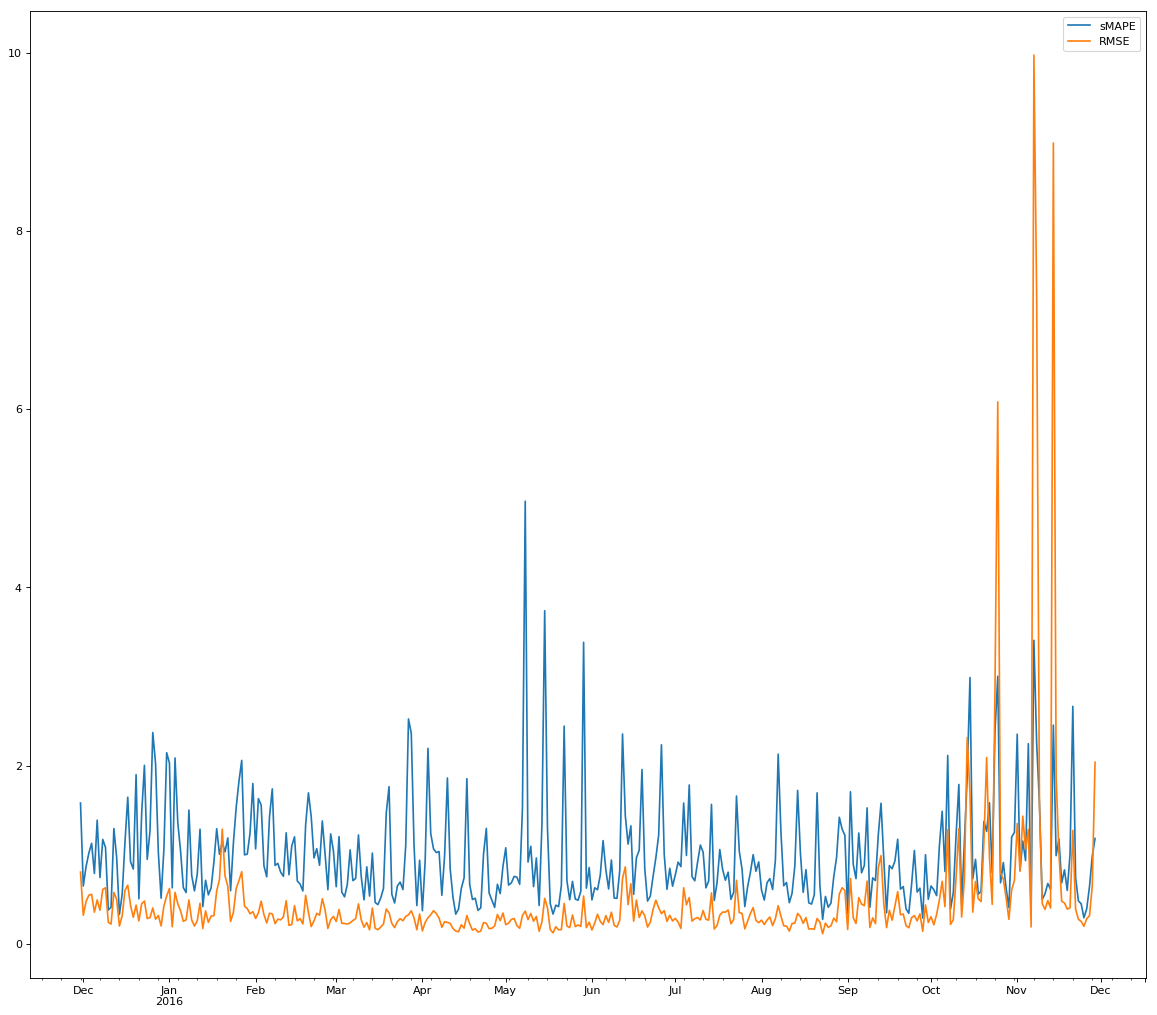

In [62]:
fig=plt.figure(figsize=(16, 14), dpi= 80, facecolor='w', edgecolor='k')
norm_sMAPE_day.plot(label='sMAPE')
norm_RMSE_day.plot(label='RMSE')
plt.legend()

## Comparing metrics with maximum and minimum values

We can visualize inspect wether sMAPE and RMSE are sensitive to large/small values. For that, we plot the normalized sMAPE and RMSE along a year and compare it with the minimum and maximum prices per day (normalized versions of min/max values).

In [81]:
norm_real_min=dfr.min(axis=1)/np.mean(dfr.values)
norm_real_max=dfr.max(axis=1)/np.mean(dfr.values)

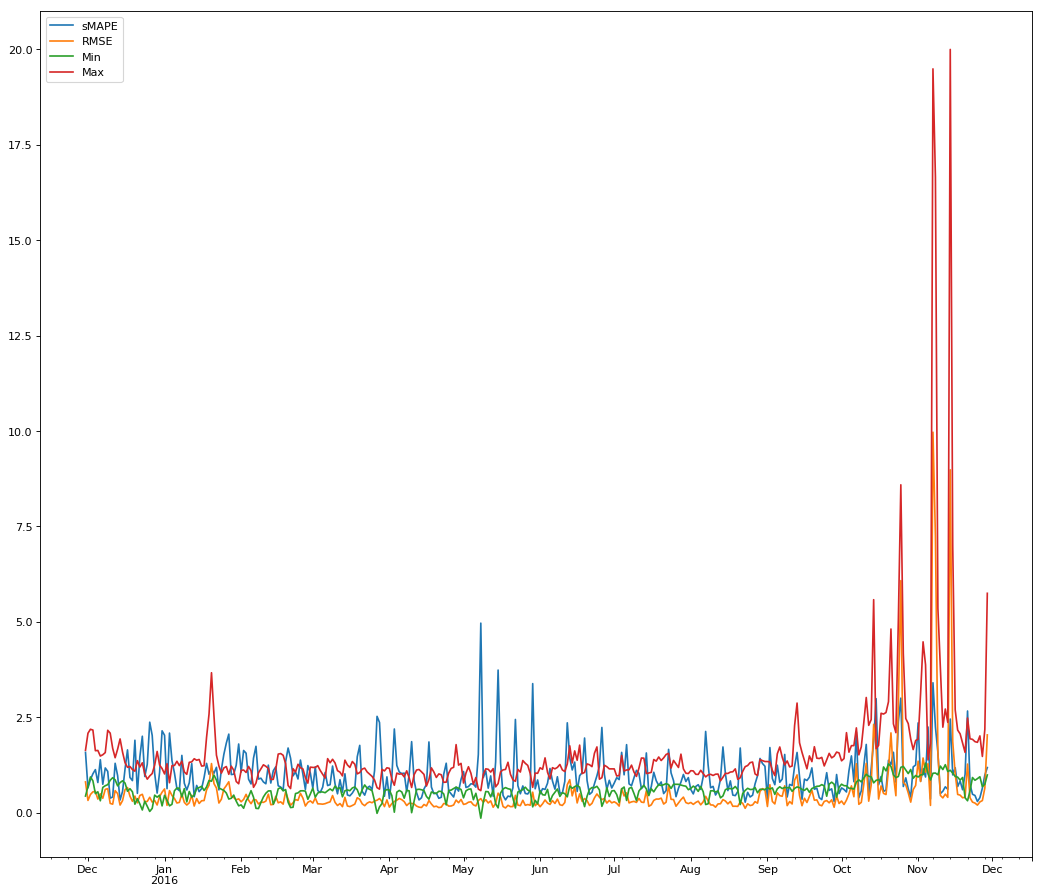

In [173]:
fig=plt.figure(figsize=(16, 14), dpi= 80, facecolor='w', edgecolor='k')
norm_sMAPE_day.plot(label='sMAPE')
norm_RMSE_day.plot(label='RMSE')
norm_real_min.plot(label='Min')
norm_real_max.plot(label='Max')
plt.legend()

From the plot, it is clear that sMAPE is sensitive to values close to 0 and RMSE is sensitive to large values (outliers).

## Pearson correlation

We can further stablish the relation between sMAPE, RMSE with small and large values. For that, we can check the correlation of both metrics with the minimum and maximum values along a year.

In [91]:
st.pearsonr(sMAPE_day,dfr.min(axis=1))

(-0.29396429888569786, 9.939295202600173e-09)

In [86]:
st.pearsonr(sMAPE_day,dfr.max(axis=1))

(0.2706397837818447, 1.4532521690447547e-07)

In [87]:
st.pearsonr(RMSE_day,dfr.min(axis=1))

(0.3291827041572893, 1.0684875192104397e-10)

In [88]:
st.pearsonr(RMSE_day,dfr.max(axis=1))

(0.952476879919265, 5.31434002209462e-190)

The correlation tells the same story. The correlation between minimum values and sMAPE is weaker than the correlation of maximum values and RMSE. Does this mean anything? Does that mean that the sensitivity of RMSE to large values is larger than the sensitive of sMAPE to small values?

## Interquantile metrics

All the metrics computed above are done over average versions of sMAPE and RMSE. One could argue that to be fair, we need to directly analyze the dispersion on the raw errors. In this part, we first compute the interquantile subsets of the raw errors (the susbset of errors between two given quantiles). Then, we compute the metrics of those interquantiles. That will give us an idea on how much the large sMAPE/RMSE values affect the final metric.

In [227]:
# Computing the relative absolute errors and the square errors
relative_abs_errors=sMAPE
square_errors=(dfr-dfp)**2

In [228]:
def compute_interquantile_subset(df,c=[5,95]):
    values=df.values.reshape(-1).copy()
    qlow=np.percentile(values,c[0])
    qhigh=np.percentile(values,c[1])
    index=np.logical_and(values>=qlow,values<=qhigh)
    return values[index]

In [229]:
# Computing the subset of errors within different quantiles
interquantiles=[[25,75],[10,90],[5,95],[2.5,97.5],[0.5,99.5],[0,100]]
relative_abs_errors_in_interquantiles = [compute_interquantile_subset(relative_abs_errors,c) for c in interquantiles]
square_errors_in_interquantiles = [compute_interquantile_subset(square_errors,c) for c in interquantiles]

In [231]:
# Computing the sMAPE and RMSE in those quantiles
sMAPE_per_interquantiles = np.array([np.mean(values) for values in relative_abs_errors_in_interquantiles])
RMSE_per_interquantiles = np.array([np.sqrt(values.mean()) for values in square_errors_in_interquantiles])

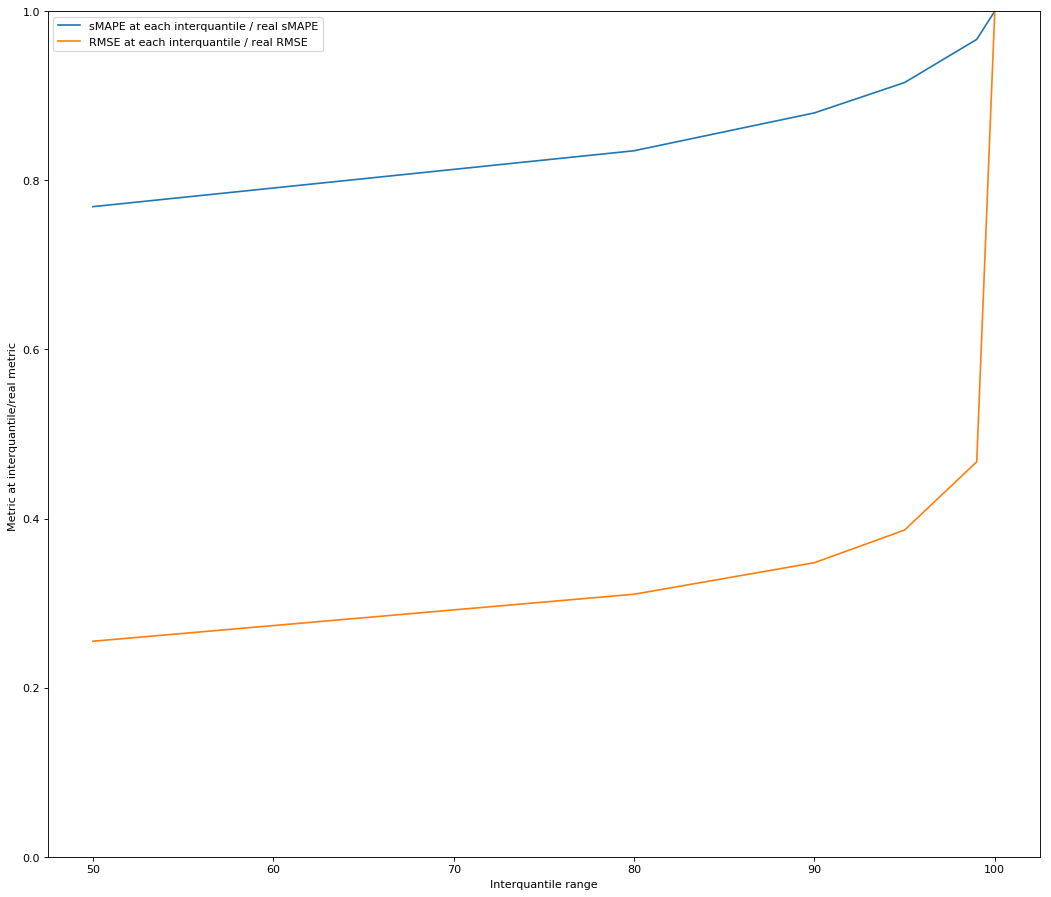

In [240]:
# Plotting the ratio between the real sMAPE/RMSE and sMAPE/RMSE of each interquantile range
interquantile_ranges=np.array([c[1]-c[0] for c in interquantiles])
fig=plt.figure(figsize=(16, 14), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(interquantile_ranges,sMAPE_per_interquantiles/sMAPE_avg,label='sMAPE at each interquantile / real sMAPE')
plt.plot(interquantile_ranges,RMSE_per_interquantiles/RMSE_avg,label='RMSE at each interquantile / real RMSE')
plt.ylabel('Metric at interquantile/real metric ')
plt.xlabel('Interquantile range')
plt.ylim([0,1])
plt.legend()

What we can observe in the plot above is that the RMSE error is hihgly biased by large values. In particular, the RMSE considering all the prediction errors approximately 4X times higher than the RMSE of the 50 interquantile range and 2X higher than the 98-95 interquantile range. By contrast, when looking at sMAPE, the final sMAPE is only 20% larger than the 50 interquantile range and 10% larger than the 95-98 interquantile range. What that shows is that, while the sMAPE is more sensitive to small values and those small values biase the final metric, the RMSE is also biased towards large valus and that bias is much larger.